In [1]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


# Get the current working directory
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

#  Set the data directory path
data_dir = os.path.join(parent_dir,"Netflix-Userbase-Visualization-Notebook", "Data", "csv")
file_path = os.path.join(data_dir,"netflix.csv")

# Read the Netflix dataset
pf = pd.read_csv(file_path)
df = pf.dropna()
df.head()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [2]:
#1. Descriptive Statistics
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


From the df.describe() data, we can infer the following:

1. User ID: The User ID ranges from 1 to 2500, with an increment of 1 for each user. The minimum User ID is 1, and the maximum User ID is 2500.

2. Monthly Revenue: The average (mean) monthly revenue generated from the user subscriptions is approximately $12.51. The minimum monthly revenue is $10.00, and the maximum monthly revenue is $15.00. The standard deviation is approximately $1.69, indicating some variability in monthly revenue.

3. Age: The average (mean) age of users in the dataset is approximately 38.80 years. The minimum age is 26 years, and the maximum age is 51 years. The standard deviation is approximately 7.17, indicating some variation in user ages.

Additionally, the quartiles provide insights into the distribution of the data:

4. The first quartile (25%) for Monthly Revenue is $11.00, meaning 25% of users have a monthly revenue of $11 or less.
The second quartile (50% or median) for Monthly Revenue is $12.00, indicating that half of the users have a monthly revenue of $12 or less.

5. The third quartile (75%) for Monthly Revenue is $14.00, meaning 75% of users have a monthly revenue of $14 or less.
The first quartile (25%) for Age is 32 years, indicating that 25% of users are 32 years old or younger.

6. The second quartile (50% or median) for Age is 39 years, meaning half of the users are 39 years old or younger.
The third quartile (75%) for Age is 45 years, indicating that 75% of users are 45 years old or younger.

Overall, the summary statistics provide an overview of the distribution of the User ID, Monthly Revenue, and Age in the dataset. It helps in understanding the central tendencies, dispersion, and range of these numerical variables.

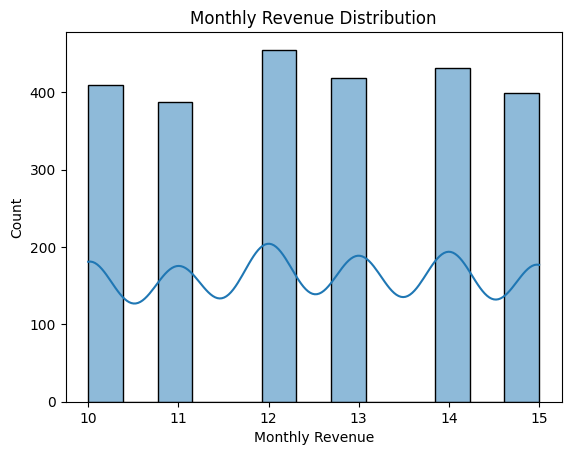

In [3]:
# 2. Histplot - Data Visualization
sns.histplot(df["Monthly Revenue"], kde=True)
plt.title("Monthly Revenue Distribution")
plt.show()

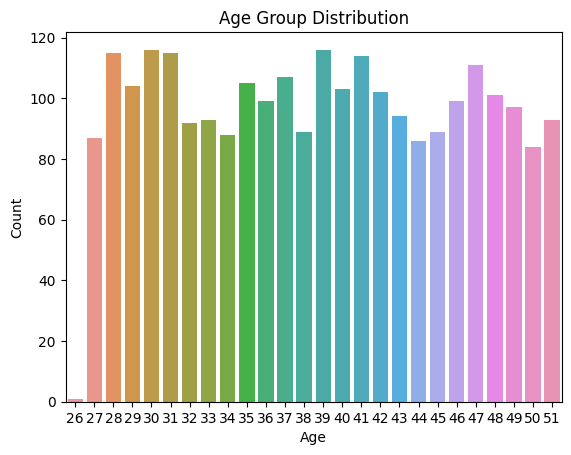

In [4]:
# 3. Bar plot - Age group distribution
sns.countplot(x='Age', data=df)
plt.title('Age Group Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

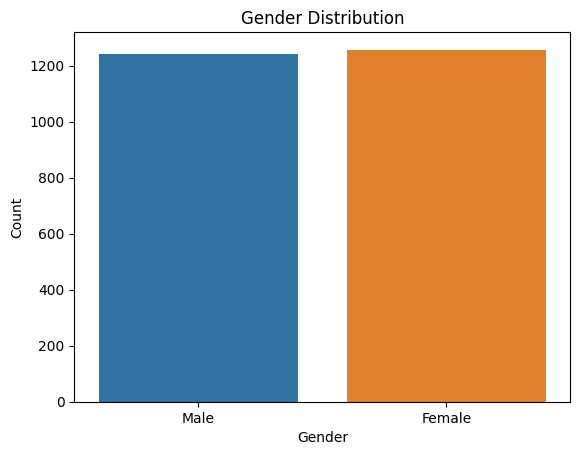

In [5]:
# 4. Bar plot - Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

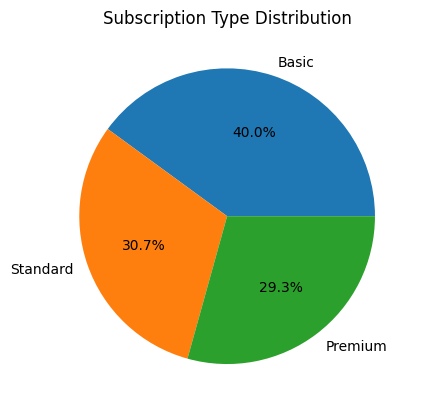

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [6]:
#5. Pie Chart - subscription type analysis
subscription_counts = df["Subscription Type"].value_counts()

plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%')
plt.title("Subscription Type Distribution")
plt.show()
subscription_counts

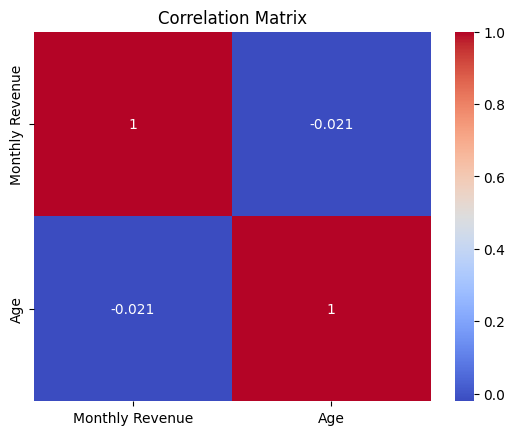

In [7]:
# 6. Heatmap- correlation matrix
corr_matrix = df[['Monthly Revenue', 'Age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Explanation of Correlation Matrix:
 A correlation coefficient of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable increases proportionally. 
 
A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases proportionally.
A correlation coefficient of 0 indicates no linear correlation between the variables.

Since the correlation coefficient is close to 0, we can conclude that there is no significant linear relationship between the age of users and their monthly revenue. In other words, knowing one variable (age) does not help predict the other variable (monthly revenue) accurately.

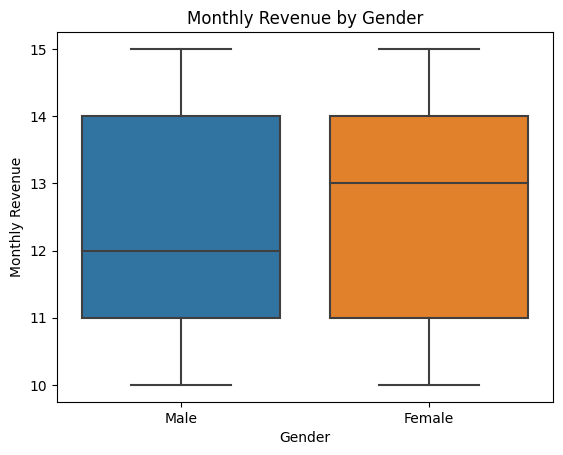

In [8]:
# 7. Box plot - Monthly revenue by gender
sns.boxplot(x='Gender', y='Monthly Revenue', data=df)
plt.title('Monthly Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Revenue')
plt.show()

# Interpretation of Box plot - Monthly revenue by gender:

If the median line (inside the box) for one gender is higher than the other gender, it suggests that, on average, users of that gender have higher monthly revenue. In this case the females show on average a higher monthly revenue, but to get a clear picture one needs to perform more statistical analysis.


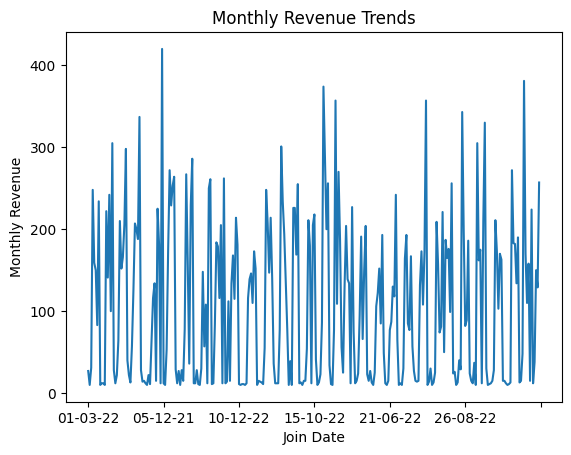

In [10]:
# 8.Trends plot- Revenue Analysis

revenue_trends = df.groupby("Join Date")["Monthly Revenue"].sum()
revenue_trends.plot(kind="line")
plt.title("Monthly Revenue Trends")
plt.xlabel("Join Date")
plt.ylabel("Monthly Revenue")
plt.show()



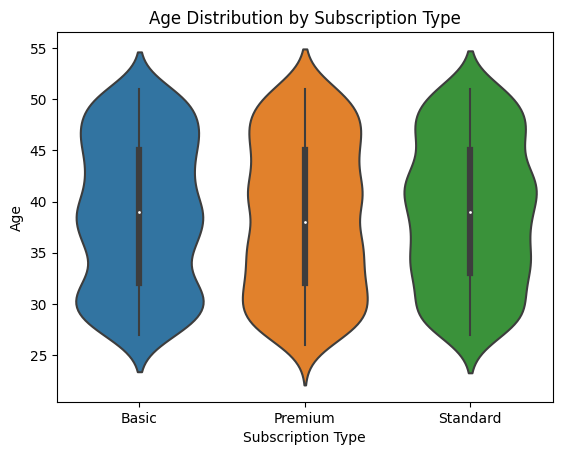

In [11]:

#  9. Violin plot - Age distribution by subscription type
sns.violinplot(x='Subscription Type', y='Age', data=df)
plt.title('Age Distribution by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Age')
plt.show()

# Explanation of Violin plot

Each violin represents the distribution of ages for a specific subscription type (e.g., Basic, Standard, or Premium).The width of each violin indicates the density of data points at different age values. Wider sections mean more users have ages in that range.

The white dot inside each violin represents the median age for that subscription type.
The thicker black bar inside each violin represents the interquartile range (IQR), containing the middle 50% of the data.
The thinner black lines (whiskers) extending from the violins indicate the entire range of the data.

The thinner vertical lines extending beyond the whiskers represent individual data points, commonly referred to as "outliers."

Interpretation:

If the white dot (median) inside a violin is closer to one end of the violin, it suggests that the median age for that subscription type is higher or lower compared to the other subscription types.
If the violins have similar widths and shapes, it indicates that the age distribution for each subscription type is relatively similar.

If the violins differ significantly in shape or width, it suggests a difference in the age distribution between subscription types.

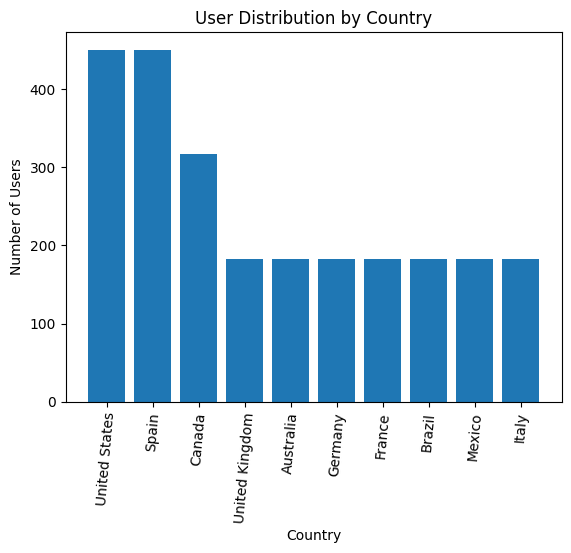

In [12]:
# 10.Bar plot- Country Analysis

country_counts = df["Country"].value_counts()
plt.bar(country_counts.index, country_counts.values)
plt.title("User Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.xticks(rotation=85)
plt.show()

In [13]:
# 11. Predictive Analysis

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Prepare the data
X = df[["Age"]]
y = df["Monthly Revenue"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 2.7813087733291315


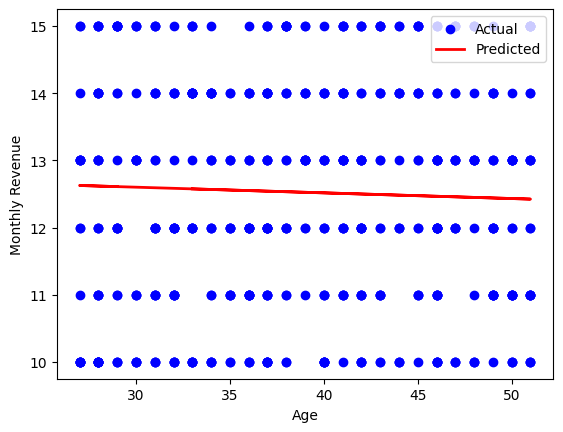

In [15]:
#12.Scatter Model visualization

# Plot the regression line and data points
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.xlabel("Age")
plt.ylabel("Monthly Revenue")
plt.legend()
plt.show()


In [14]:
#13. Getting the coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

print("Coefficient:", coef)
print("Intercept:", intercept)


Coefficient: -0.008446288643836689
Intercept: 12.853665321649


# Coefficient: 
The coefficient represents the change in the target variable (Monthly Revenue) for a one-unit change in the predictor variable (Age). In this case, the coefficient is approximately -0.0084. It indicates that, on average, for every one-unit increase in Age, the Monthly Revenue decreases by approximately $0.0084.

# Intercept: 
The intercept represents the expected value of the target variable (Monthly Revenue) when the predictor variable (Age) is zero. In this case, the intercept is approximately 12.8537. It means that when Age is zero (which might not be a realistic scenario in the context of Age and Revenue), the expected Monthly Revenue is approximately $12.85.

For example, let's say we have a person with Age = 40:

Monthly Revenue = 12.8537 + (-0.0084 * 40) ≈ 12.8537 - 0.336 ≈ 12.5177

So, according to the model, the expected Monthly Revenue for a person with Age 40 would be approximately $12.52.

In [16]:
#14. Calculate R-squared value

from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: -0.006933994071707472


# Explanation of R-Squared value
A negative R-squared value suggests that the model's predictions are worse than simply using the mean of the target variable as a constant prediction. In this case, the model may not be suitable for capturing the relationship between the predictor variable (Age) and the target variable (Monthly Revenue), or there may be issues with the assumptions of the Linear Regression model for this particular dataset.

In [18]:
# 15. Predict revenue for new data points
new_data_points = pd.DataFrame({"Age": [20, 25, 30, 35, 55, 60]})
new_predictions = model.predict(new_data_points)

print("Predicted Monthly Revenue for new data points:")
print(new_predictions)

Predicted Monthly Revenue for new data points:
[12.68473955 12.64250811 12.60027666 12.55804522 12.38911945 12.346888  ]
